# KDD Cup 2012 track 2 Data Visualization

## Index

1. [Importing Libraries](#1)
1. [Data Selection and Features Extraction](#2)
1. [Data Visualization](#3)


## 1. Importing Libraries <a name="1"></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import anderson,kstest, shapiro

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

Output hidden; open in https://colab.research.google.com to view.

## 2. Data Selection and Features Extraction <a name="2"></a>

A search session refers to an interaction between a user and the search engine. It contains the following ingredients: the user, the query issued by the user, some ads returned by the search engine and thus impressed (displayed) to the user, and zero or more ads that were clicked by the user. For clarity, we introduce a terminology here. The number of ads impressed in a session is known as the ’**depth**’. The order of an ad in the impression list is known as the ‘**position**’ of that ad.
Each training instance is a line consisting of fields delimited by the TAB character:

1. **Click**: as described in the above list.

2. **Impression**: as described in the above list.

3. **DisplayURL**: a property of the ad.

The URL is shown together with the title and description of an ad. It is usually the shortened landing page URL of the ad, but not always. In the data file,  this URL is hashed for anonymity.

4. **AdID**: as described in the above list.

5. **AdvertiserID**: a property of the ad.

Some advertisers consistently optimize their ads, so the title and description of their ads are more attractive than those of others’ ads.

6. **Depth**: a property of the session, as described above.   

7. **Position**: a property of an ad in a session, as described above.

8. **QueryID**:  id of the query.

This id is a zero‐based integer value. It is the key of the data file 'queryid_tokensid.txt'.

9. **KeywordID**: a property of ads.

This is the key of  'purchasedkeyword_tokensid.txt'.

10. **TitleID**: a property of ads.

This is the key of 'titleid_tokensid.txt'.

11. **DescriptionID**: a property of ads.

 This is the key of 'descriptionid_tokensid.txt'.

12. **UserID**

This is the key of 'userid_profile.txt'.  When we cannot identify the user, this field has a special value of 0.

For processing, please visit this [link](https://www.kaggle.com/code/santanukundu/kdd-cup-data-analysis-1). Colab will fail to handle enormous data.

## 3. Data Visualization <a name="3"></a>

In [ ]:
!gdown 15yXHWDK_L3sdQdLutRbD8a0PPDn-NVbs -O train.csv
!gdown 1sI-IwQGnxDHcWWHgFB15XVr3wpX2M4b- -O test.csv

Downloading...
From: https://drive.google.com/uc?id=15yXHWDK_L3sdQdLutRbD8a0PPDn-NVbs
To: /content/train.csv
100% 2.51G/2.51G [00:39<00:00, 64.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sI-IwQGnxDHcWWHgFB15XVr3wpX2M4b-
To: /content/test.csv
100% 3.52G/3.52G [01:01<00:00, 57.3MB/s]


In [ ]:
percentiles = [.05, .1, .25,.5,.68,.75,.90,.95,.997]

In [ ]:
%%time
train_df = pd.read_csv("train.csv")

CPU times: user 57.2 s, sys: 14.6 s, total: 1min 11s
Wall time: 1min 22s


In [ ]:
train_df.head().T

,0,1,2,3,4
Click,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Impression,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
DisplayURL,4.298119e+18,4.860571e+18,9.704321e+18,1.367763e+19,3.284760e+18
AdId,7.686695e+06,2.156066e+07,2.174848e+07,3.517124e+06,2.075809e+07
AdvertiserId,3.850000e+02,3.748400e+04,3.675900e+04,2.377800e+04,3.453500e+04
Depth,3.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00
Position,3.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
Id,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
Gender,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
AgeGroup,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


In [ ]:
impressions = train_df['Impression']
clicks = train_df['Click']

In [ ]:
train_df.shape

(13658036, 27)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13658036 entries, 0 to 13658035
Data columns (total 27 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Click                  int64  
 1   Impression             int64  
 2   DisplayURL             uint64 
 3   AdId                   int64  
 4   AdvertiserId           int64  
 5   Depth                  int64  
 6   Position               int64  
 7   Id                     int64  
 8   Gender                 float64
 9   AgeGroup               float64
 10  Query_len              int64  
 11  Desc_len               int64  
 12  Title_len              int64  
 13  Keyword_len            int64  
 14  Query_Desc_cos_sim     float64
 15  Query_Title_cos_sim    float64
 16  Query_Keyword_cos_sim  float64
 17  Desc_Title_cos_sim     float64
 18  Desc_Keyword_cos_sim   float64
 19  Title_Keyword_cos_sim  float64
 20  Query_Desc_sim         int64  
 21  Query_Title_sim        int64  
 22  Query_Keyword_si

In [ ]:
train_df.nunique()

Click                        617
Impression                  2967
DisplayURL                 23205
AdId                      326027
AdvertiserId               14465
Depth                          3
Position                       3
Id                       7000000
Gender                         3
AgeGroup                       6
Query_len                    122
Desc_len                      48
Title_len                     29
Keyword_len                   14
Query_Desc_cos_sim          1038
Query_Title_cos_sim          578
Query_Keyword_cos_sim        262
Desc_Title_cos_sim          1807
Desc_Keyword_cos_sim         547
Title_Keyword_cos_sim        327
Query_Desc_sim                12
Query_Title_sim               13
Query_Keyword_sim             12
Desc_Title_sim                21
Desc_Keyword_sim              11
Title_Keyword_sim             12
CTR                        11520
dtype: int64

In [ ]:
train_df.isnull().sum()/len(train_df)

Click                    0.000000
Impression               0.000000
DisplayURL               0.000000
AdId                     0.000000
AdvertiserId             0.000000
Depth                    0.000000
Position                 0.000000
Id                       0.000000
Gender                   0.093251
AgeGroup                 0.093251
Query_len                0.000000
Desc_len                 0.000000
Title_len                0.000000
Keyword_len              0.000000
Query_Desc_cos_sim       0.000000
Query_Title_cos_sim      0.000000
Query_Keyword_cos_sim    0.000000
Desc_Title_cos_sim       0.000000
Desc_Keyword_cos_sim     0.000000
Title_Keyword_cos_sim    0.000000
Query_Desc_sim           0.000000
Query_Title_sim          0.000000
Query_Keyword_sim        0.000000
Desc_Title_sim           0.000000
Desc_Keyword_sim         0.000000
Title_Keyword_sim        0.000000
CTR                      0.000000
dtype: float64

In [ ]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Click,13658036.0,6.016702e-01,1.911026e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.990000e+04
Impression,13658036.0,3.089133e+00,1.535367e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.784560e+05
DisplayURL,13658036.0,9.665275e+18,4.997758e+18,4.824369e+14,5.468728e+18,1.042837e+19,1.434039e+19,1.844590e+19
AdId,13658036.0,1.596838e+07,7.200850e+06,1.000031e+06,9.027213e+06,2.022256e+07,2.116255e+07,2.223730e+07
AdvertiserId,13658036.0,2.234880e+04,1.168208e+04,7.800000e+01,1.410300e+04,2.380800e+04,3.040500e+04,3.919100e+04
Depth,13658036.0,1.886489e+00,6.819501e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
Position,13658036.0,1.379495e+00,5.794344e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
Id,13658036.0,3.416649e+06,1.975071e+06,0.000000e+00,1.707254e+06,3.414508e+06,5.121763e+06,6.999999e+06
Gender,12384405.0,1.426458e+00,5.233250e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
AgeGroup,12384405.0,3.390029e+00,1.356756e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00


In [ ]:
train_df[['AdId','AdvertiserId']].drop_duplicates().reset_index(drop=True)

,AdId,AdvertiserId
0,7686695,385
1,21560664,37484
2,21748480,36759
3,3517124,23778
4,20758093,34535
...,...,...
326022,21854144,27503
326023,20151523,24124
326024,22073336,38370
326025,3912831,385


### Top 10 advertisers based on count of total number of ADs they are running

In [ ]:
## Top 10 advertisers

x = train_df[['AdId', 'AdvertiserId']].drop_duplicates().groupby('AdvertiserId').count()\
.sort_values('AdId', ascending = False).reset_index()
x.columns = ['AdvertiserId', 'Total Ads']
x.head(10)

,AdvertiserId,Total Ads
0,385,19309
1,23777,14007
2,27482,4690
3,24354,4390
4,3625,3927
5,2051,3767
6,27961,3572
7,23808,3073
8,27503,2955
9,387,2686


### Distribution of total number of Ads among Advertisers

In [ ]:
x[['Total Ads']].describe(percentiles=percentiles)

,Total Ads
count,14465.000000
mean,22.539025
std,225.262195
min,1.000000
25%,3.000000
50%,6.000000
68%,10.000000
75%,13.000000
90%,36.000000
95%,71.000000


In [ ]:
bins = [0, 4, 9, 14, 24, 49, 99, 1999, 4999, 15999, 19999]
x['bins'] = pd.cut(x["Total Ads"],bins)
x['bins'].value_counts()/len(x)

(0, 4]            0.429381
(4, 9]            0.246042
(9, 14]           0.100518
(14, 24]          0.083996
(24, 49]          0.066851
(49, 99]          0.042240
(99, 1999]        0.030142
(1999, 4999]      0.000691
(4999, 15999]     0.000069
(15999, 19999]    0.000069
Name: bins, dtype: float64

In [ ]:
import plotly.express as px
fig = px.box(x, y ="Total Ads",points='all')
fig.show(renderer="colab")

In [ ]:
# distribution of ads of each adverisers

import plotly.express as px

## As top ~2000 value is exceptionally high, so we are dropping them from visualization

#  Distribution of Lower 11998 values
fig = px.histogram(x, x="Total Ads",nbins=100,log_y=True)
fig.update_layout(bargap=0.2)
fig.show(renderer="colab")

### Is DisplayURL advertiser specific?

In [ ]:
x = train_df[['DisplayURL', 'AdvertiserId']].drop_duplicates().groupby('DisplayURL').count()\
                                            .sort_values('AdvertiserId', ascending=False).reset_index()

x.head(10)

,DisplayURL,AdvertiserId
0,2565631318136778349,36
1,15294836932684971541,15
2,11031865546427739798,14
3,3811034684121320330,12
4,13056190624999340747,12
5,14531867648059391627,11
6,14759604580264061515,10
7,15598290488723159826,9
8,1709288634456567194,9
9,2737109102595248581,8


In [ ]:
x.describe(percentiles=[.25,.5,.68,.75,.95,.998])

,DisplayURL,AdvertiserId
count,2.320500e+04,23205.000000
mean,9.200325e+18,1.015212
std,5.314745e+18,0.345735
min,4.824369e+14,1.000000
25%,4.566923e+18,1.000000
50%,9.239035e+18,1.000000
68%,1.249263e+19,1.000000
75%,1.377556e+19,1.000000
95%,1.749261e+19,1.000000
99.8%,1.840397e+19,3.000000


Now we can say landing URL or DisplayURL is not specific to AdvertiserId, as for each DisplayURL there is more than max 1 AdvertiserID. It means a adviser company can have multiple IDs.

### Number of Different DisplayURLs used by Advertisers

In [ ]:
x = train_df[['DisplayURL', 'AdvertiserId']].drop_duplicates().groupby('AdvertiserId').count()\
                                            .sort_values('DisplayURL', ascending=False).reset_index()

x.head(10)

,AdvertiserId,DisplayURL
0,32244,370
1,5079,309
2,28112,174
3,28779,138
4,7205,99
5,38060,73
6,421,49
7,29683,43
8,37600,37
9,10579,37


### Top 10 display URLs visited by users

When display url is visited, clicks gets increased. So, top 10 most clicked urls will be the top 10 visited urls.

In [ ]:
x = train_df[['DisplayURL', 'Click']].groupby('DisplayURL').mean()\
                                      .sort_values('Click', ascending=False).reset_index()
x.head(10)

,DisplayURL,Click
0,4049493596200390970,46.235294
1,14166354747202901845,16.266055
2,436023454659192445,15.000000
3,7282775708582831748,12.294118
4,4983171260422479322,9.424460
5,5034666190104207988,8.684964
6,16626621295632535941,8.643780
7,11413658651778437953,8.627376
8,704113234308624157,7.402439
9,9353600622199395914,7.000000


In [ ]:
x.shape

(23205, 2)

In [ ]:
# percentage of total impressions aquired by top 10 Display URLs
x['Click'] /= len(x)
x.head(10)

,DisplayURL,Click
0,4049493596200390970,0.001992
1,14166354747202901845,0.000701
2,436023454659192445,0.000646
3,7282775708582831748,0.000530
4,4983171260422479322,0.000406
5,5034666190104207988,0.000374
6,16626621295632535941,0.000372
7,11413658651778437953,0.000372
8,704113234308624157,0.000319
9,9353600622199395914,0.000302


In [ ]:
x = train_df[['DisplayURL', 'Impression']].groupby('DisplayURL').mean()\
                                      .sort_values('Impression', ascending=False).reset_index()
x.head(10)

,DisplayURL,Impression
0,4151297533975027271,461.643533
1,1071065113963863535,429.048673
2,2042482030344742824,373.723982
3,8137711196890345292,312.000000
4,18263224925521973275,275.566038
5,8005478670098854094,247.800000
6,1972632897199818830,231.360000
7,9006469602394718390,158.923954
8,17710836674381725772,120.497696
9,7596446292736726227,119.649254


### Distribution of Click over depth

In [ ]:
x = train_df[['Click', 'Depth']].groupby('Depth').sum().reset_index()
x.columns = ['Depth', 'Sum of Clicks']
x

,Depth,Sum of Clicks
0,1,2704633
1,2,4252633
2,3,1260367


In [ ]:
fig = px.bar(x,x='Depth', y= 'Sum of Clicks')
fig.show(renderer="colab")

In [ ]:
x = train_df[['Click', 'Depth']].groupby('Depth').mean().reset_index()
x.columns = ['Depth', 'Mean of Clicks']
x

,Depth,Mean of Clicks
0,1,0.669624
1,2,0.596417
2,3,0.506437


In [ ]:
fig = px.bar(x,x='Depth', y= 'Mean of Clicks')
fig.show(renderer="colab")

If depth (Number of ads impressed in a session) is lower, it more likely to get clicked.

In [ ]:
x = train_df[['CTR', 'Depth']].groupby('Depth').mean().reset_index()
x.columns = ['Depth', 'Mean of CTR']
x

,Depth,Mean of CTR
0,1,0.419059
1,2,0.441285
2,3,0.383206


In [ ]:
fig = px.bar(x,x='Depth', y= 'Mean of CTR')
fig.show(renderer="colab")

In [ ]:
x = train_df[['Depth', 'Click', 'Impression']]
x = x.groupby('Depth').sum().reset_index()
x['Weighted CTR'] = x['Click']/x['Impression']
x = x[['Depth', 'Weighted CTR']]
x

,Depth,Weighted CTR
0,1,0.191471
1,2,0.212914
2,3,0.155745


In [ ]:
fig = px.bar(x,x='Depth', y= 'Weighted CTR')
fig.show(renderer="colab")

### Distribution of Click over Position

In [ ]:
x = train_df[['Click', 'Position']].groupby('Position').sum().reset_index()
x.columns = ['Position', 'Sum of Clicks']
x

,Position,Sum of Clicks
0,1,6236044
1,2,1759889
2,3,221700


In [ ]:
fig = px.bar(x, x = 'Position', y='Sum of Clicks')
fig.show(renderer="colab")

In [ ]:
x = train_df[['Click', 'Position']].groupby('Position').mean().reset_index()
x.columns = ['Position', 'Mean of Clicks']
x

,Position,Mean of Clicks
0,1,0.680821
1,2,0.461462
2,3,0.323784


In [ ]:
fig = px.bar(x, x = 'Position', y ='Mean of Clicks')
fig.show(renderer="colab")

In [ ]:
x = train_df[['Position', 'Click', 'Impression']]
x = x.groupby('Position').sum().reset_index()
x['Weighted CTR'] = x['Click']/x['Impression']
x = x[['Position', 'Weighted CTR']]
x

,Position,Weighted CTR
0,1,0.216580
1,2,0.156992
2,3,0.101317


In [ ]:
fig = px.bar(x,x='Position', y= 'Weighted CTR')
fig.show(renderer="colab")

In [ ]:
from scipy.stats import spearmanr
spearmanr(train_df['Position'], train_df['Click'])

SignificanceResult(statistic=-0.1492431792770609, pvalue=0.0)

In [ ]:
spearmanr(train_df['Position'], train_df['CTR'])

SignificanceResult(statistic=-0.14480376499614442, pvalue=0.0)

In [ ]:
fig = px.box(train_df[-10000:], x = 'Position', y='CTR')
fig.show(renderer="colab")

If position of ads is lower, it is more probable to get clicked.

### Multivariate Numerical Analysis

In [ ]:
train_df.columns

Index(['Click', 'Impression', 'DisplayURL', 'AdId', 'AdvertiserId', 'Depth',
       'Position', 'Id', 'Gender', 'AgeGroup', 'Query_len', 'Desc_len',
       'Title_len', 'Keyword_len', 'Query_Desc_cos_sim', 'Query_Title_cos_sim',
       'Query_Keyword_cos_sim', 'Desc_Title_cos_sim', 'Desc_Keyword_cos_sim',
       'Title_Keyword_cos_sim', 'Query_Desc_sim', 'Query_Title_sim',
       'Query_Keyword_sim', 'Desc_Title_sim', 'Desc_Keyword_sim',
       'Title_Keyword_sim', 'CTR'],
      dtype='object')

In [ ]:
numerical_cols = [ 'Click', 'Impression',
#                    'DisplayURL', 'AdId', 'AdvertiserId',
                   'Depth','Position', 'Query_len', 'Desc_len',
                   'Title_len', 'Keyword_len', 'Query_Desc_cos_sim', 'Query_Title_cos_sim',
                   'Query_Keyword_cos_sim', 'Desc_Title_cos_sim', 'Desc_Keyword_cos_sim',
                   'Title_Keyword_cos_sim', 'Query_Desc_sim', 'Query_Title_sim',
                   'Query_Keyword_sim', 'Desc_Title_sim', 'Desc_Keyword_sim',
                   'Title_Keyword_sim', 'CTR'
                 ]
categorical_cols = [ 'Gender', 'AgeGroup']

In [ ]:
bins = [ -1, 0, .5, .99, 1]
x['bins'] = pd.cut(x['CTR'],bins)
x.groupby('bins').sum()['Total']/len(train_df)

bins
(-1.0, 0.0]    0.512519
(0.0, 0.5]     0.096749
(0.5, 0.99]    0.003306
(0.99, 1.0]    0.387426
Name: Total, dtype: float64

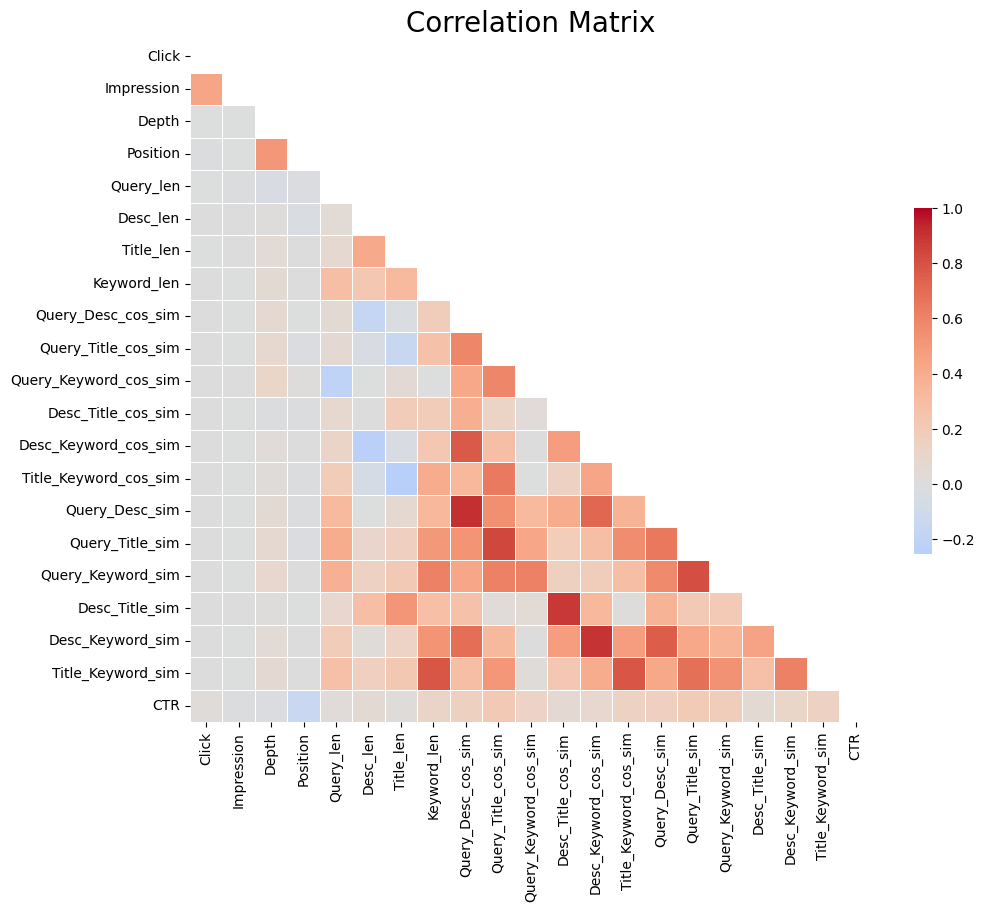

In [ ]:
corr = train_df[numerical_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix', fontsize=20)
plt.savefig("Correlation matrix.png")
plt.show()

In [ ]:
                                                                                                                                                                                                                                                                                        qa!QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQx = corr.where(np.triu(np.ones_like(corr, dtype=bool))).stack().reset_index()
x.columns = ['feature_1','feature_2', 'Correlation']
x = x[x.feature_1!=x.feature_2].sort_values('Correlation', ascending=False, key = lambda x: abs(x)).reset_index(drop=True)
x.head(20)

,feature_1,feature_2,Correlation
0,Query_Desc_cos_sim,Query_Desc_sim,0.908886
1,Desc_Keyword_cos_sim,Desc_Keyword_sim,0.901928
2,Desc_Title_cos_sim,Desc_Title_sim,0.886543
3,Query_Title_cos_sim,Query_Title_sim,0.834650
4,Query_Title_sim,Query_Keyword_sim,0.809119
5,Keyword_len,Title_Keyword_sim,0.786189
6,Title_Keyword_cos_sim,Title_Keyword_sim,0.784717
7,Query_Desc_cos_sim,Desc_Keyword_cos_sim,0.766840
8,Query_Desc_sim,Desc_Keyword_sim,0.762721
9,Desc_Keyword_cos_sim,Query_Desc_sim,0.721658


In [ ]:
x[ (x.feature_1=='CTR') | (x.feature_2=='CTR')].reset_index(drop=True)

,feature_1,feature_2,Correlation
0,Query_Title_cos_sim,CTR,0.211537
1,Query_Title_sim,CTR,0.206006
2,Query_Keyword_sim,CTR,0.174614
3,Query_Desc_sim,CTR,0.159781
4,Query_Desc_cos_sim,CTR,0.147967
5,Title_Keyword_sim,CTR,0.144713
6,Title_Keyword_cos_sim,CTR,0.142944
7,Position,CTR,-0.140902
8,Query_Keyword_cos_sim,CTR,0.129899
9,Keyword_len,CTR,0.108942


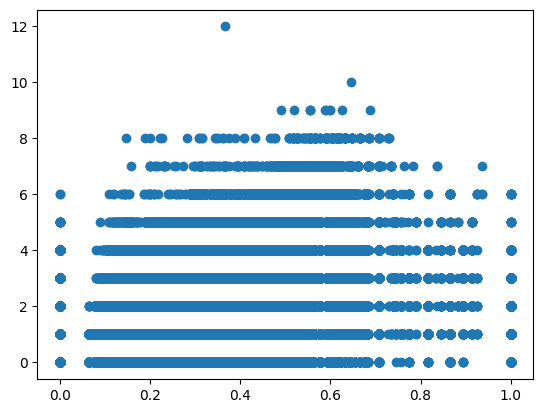

In [ ]:
plt.scatter(train_df['Desc_Keyword_cos_sim'], train_df['Query_Desc_sim'],)
plt.show()

In [ ]:
%%time
func = lambda x: 'blue' if x>0 else 'red'
cmap = np.vectorize(func)(train_df['CTR'])

CPU times: user 4.52 s, sys: 1.37 s, total: 5.9 s
Wall time: 5.88 s


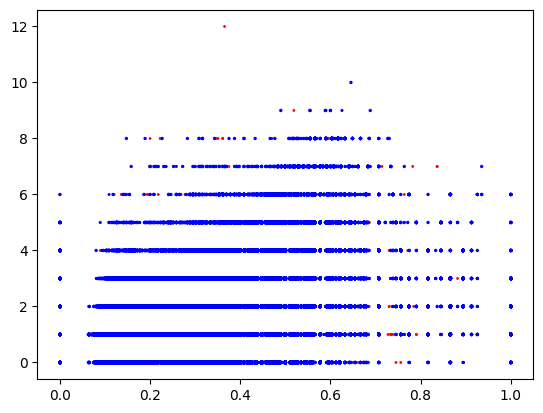

CPU times: user 3min 6s, sys: 3.34 s, total: 3min 10s
Wall time: 3min 9s


In [ ]:
%%time
plt.scatter(train_df['Desc_Keyword_cos_sim'], train_df['Query_Desc_sim'],c=cmap,s=(1+train_df['CTR']))
plt.show()

In [ ]:
drop_cols = [ 'Query_Title_sim', 'Query_Desc_cos_sim',
              'Title_Keyword_cos_sim', 'Keyword_len', 'Desc_Keyword_sim'
            ]

### AgeGroup and Gender analysis


In [ ]:
train_df["Gender"].value_counts(dropna=False)

Gender
1.0    6740391
2.0    5462722
NaN    1273631
0.0     181292
Name: count, dtype: int64

In [ ]:
train_df["AgeGroup"].value_counts(dropna=False)

AgeGroup
3.0    3754271
4.0    2642054
2.0    2107527
5.0    1911913
NaN    1273631
1.0    1086800
6.0     881840
Name: count, dtype: int64

In [ ]:
train_df[['AgeGroup', 'Gender']].describe()

,AgeGroup,Gender
count,1.238440e+07,1.238440e+07
mean,3.390029e+00,1.426458e+00
std,1.356756e+00,5.233250e-01
min,1.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00
50%,3.000000e+00,1.000000e+00
75%,4.000000e+00,2.000000e+00
max,6.000000e+00,2.000000e+00


In [ ]:
train_df[['AgeGroup', 'Gender']].mode()

,AgeGroup,Gender
0,3.0,1.0


In [ ]:
%%time
train_df['AgeGroupImputed'] = train_df['AgeGroup'].fillna(3)
train_df['GenderImputed'] = train_df['Gender'].fillna(1)

CPU times: user 347 ms, sys: 0 ns, total: 347 ms
Wall time: 315 ms


### Distribution of CTR

In [ ]:
train_df_sampled = train_df.sample(10000, random_state = 42)
train_df_sampled.head()

,Click,Impression,DisplayURL,AdId,AdvertiserId,Depth,Position,Id,Gender,AgeGroup,...,Title_Keyword_cos_sim,Query_Desc_sim,Query_Title_sim,Query_Keyword_sim,Desc_Title_sim,Desc_Keyword_sim,Title_Keyword_sim,CTR,AgeGroupImputed,GenderImputed
7066833,1,1,15859647530187389343,4291065,23778,3,2,66833,2.0,1.0,...,0.408248,1,1,2,3,1,1,1.0,1.0,2.0
12957968,1,1,11029660940276564672,3834142,27485,2,1,5957968,2.0,4.0,...,0.577350,0,1,1,3,1,2,1.0,4.0,2.0
10459465,1,1,9181086387423655937,21138842,35512,3,1,3459465,2.0,3.0,...,0.707107,1,2,2,2,1,2,1.0,3.0,2.0
164953,0,1,5664657886268478404,21442126,37070,3,3,164953,2.0,5.0,...,0.500000,2,1,1,6,2,2,0.0,5.0,2.0
924805,0,1,2470253408587161992,21193219,35900,1,1,924805,1.0,5.0,...,0.288675,0,1,1,8,0,1,0.0,5.0,1.0


In [ ]:
import plotly.express as px
fig = px.histogram(train_df_sampled[train_df_sampled['GenderImputed']==0], x='CTR', nbins=20)
fig.show(renderer="colab")

In [ ]:
fig = px.histogram(train_df_sampled[train_df_sampled['GenderImputed']==1], x='CTR', nbins=20)
fig.show(renderer="colab")

In [ ]:
fig = px.histogram(train_df_sampled[train_df_sampled['GenderImputed']==2], x='CTR', nbins=20)
fig.show(renderer="colab")

In [ ]:
train_df_sampled['GenderImputed'].unique()

array([2., 1., 0.])

In [ ]:
from scipy.stats import kruskal, f_oneway
gender_0 = train_df_sampled[train_df_sampled['GenderImputed']==0]['CTR']
gender_1 = train_df_sampled[train_df_sampled['GenderImputed']==1]['CTR']
gender_2 = train_df_sampled[train_df_sampled['GenderImputed']==2]['CTR']

Though distribution does not follow normal distribution but we are likely to test ANOVA here.

In [ ]:
gender_0.mean(), gender_1.mean(), gender_2.mean()

(0.35617283950617284, 0.4400241932356522, 0.4013093235920309)

In [ ]:
f_oneway(gender_0, gender_1, gender_2)

F_onewayResult(statistic=9.661587485809493, pvalue=6.427999646476126e-05)

In [ ]:
kruskal(gender_0, gender_1, gender_2)

KruskalResult(statistic=36.66185698510574, pvalue=1.0939032371348045e-08)

In [ ]:
train_df_sampled['AgeGroupImputed'].unique()

array([1., 4., 3., 5., 6., 2.])

In [ ]:
age_1 = train_df_sampled[train_df_sampled['AgeGroupImputed']==1]['CTR']
age_2 = train_df_sampled[train_df_sampled['AgeGroupImputed']==2]['CTR']
age_3 = train_df_sampled[train_df_sampled['AgeGroupImputed']==3]['CTR']
age_4 = train_df_sampled[train_df_sampled['AgeGroupImputed']==4]['CTR']
age_5 = train_df_sampled[train_df_sampled['AgeGroupImputed']==5]['CTR']
age_6 = train_df_sampled[train_df_sampled['AgeGroupImputed']==6]['CTR']

In [ ]:
age = [age_1, age_2, age_3, age_4, age_5, age_6]
for i in range(6):
    print(f"Age Group {i+1}, mean: {age[i].mean():.4f}, median: {age[i].median():.4f},mode: {age[i].mode()[0]}")

Age Group 1, mean: 0.3540, median: 0.0000,mode: 0.0
Age Group 2, mean: 0.3691, median: 0.0000,mode: 0.0
Age Group 3, mean: 0.4684, median: 0.3333,mode: 0.0
Age Group 4, mean: 0.4169, median: 0.0000,mode: 0.0
Age Group 5, mean: 0.4111, median: 0.0000,mode: 0.0
Age Group 6, mean: 0.4232, median: 0.0000,mode: 0.0


In [ ]:
f_oneway(age_1, age_2, age_3, age_4, age_5, age_6)

F_onewayResult(statistic=14.62354792503624, pvalue=2.5968152590463388e-14)

In [ ]:
kruskal(age_1, age_2, age_3, age_4, age_5, age_6)

KruskalResult(statistic=119.65308491814335, pvalue=3.717149393832969e-24)

We have observed low p value in both cases. Therefore, we can say
- The population median and mean of all of the Age groups are not equal.
- The population median and mean of all of the Gender are not equal.

In [ ]:
x = pd.crosstab(train_df_sampled['AgeGroupImputed'], train_df_sampled['GenderImputed'])
x

GenderImputed,0.0,1.0,2.0
AgeGroupImputed,,,
1.0,138,400,297
2.0,7,876,643
3.0,7,2388,1277
4.0,2,1022,934
5.0,5,724,626
6.0,3,352,299


In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(x)

Chi2ContingencyResult(statistic=1390.648513262758, pvalue=1.0364597732248233e-292, dof=10, expected_freq=array([[  13.527 ,  481.127 ,  340.346 ],
       [  24.7212,  879.2812,  621.9976],
       [  59.4864, 2115.8064, 1496.7072],
       [  31.7196, 1128.1996,  798.0808],
       [  21.951 ,  780.751 ,  552.298 ],
       [  10.5948,  376.8348,  266.5704]]))

- Very low value of p suggests that distribution of AgeGroup and gender are  dependent.

In [ ]:
%%time
x = pd.crosstab(train_df['AgeGroupImputed'], train_df['GenderImputed'])
x

CPU times: user 5.08 s, sys: 1.72 ms, total: 5.08 s
Wall time: 5.91 s


GenderImputed,0.0,1.0,2.0
AgeGroupImputed,,,
1.0,141055,528382,417363
2.0,13304,1286037,808186
3.0,12826,3270643,1744433
4.0,6377,1393097,1242580
5.0,4648,1036857,870408
6.0,3082,499006,379752


In [ ]:
chi2_contingency(x)

Chi2ContingencyResult(statistic=1374928.6190765887, pvalue=0.0, dof=10, expected_freq=array([[  14425.80365142,  637693.37770086,  434680.81864772],
       [  27974.57737584, 1236617.60326258,  842934.81936158],
       [  66738.61522872, 2950183.85087314, 2010979.53389814],
       [  35069.70209831, 1550257.94932654, 1056726.34857515],
       [  25378.06545509, 1121838.66290043,  764696.27164447],
       [  11705.23619062,  517430.55593645,  352704.20787293]]))

**Assumption**
- All data has been taken within certain timeframe, i.e. every Ad is available during that time frame. Otherwise, newer ad might get less CTR as they get less time.


**Observation**
- There are 13658036 datapoints or approximately 14 million datapoints.
- There are 27 features.
- Id is redundant. It is nothing but row id.
- CTR is our target feature.
- (Depth, position), AdId,AdvertiserId, Gender, AgeGroup can be considered as categorical features.
- 9.33% of each of Gender and AgeGroup data is missing. Because some of user data are missing from original file.
- There are 326027 unique ads, 14465 unique advertisers.
- Maximum number of Ads are running by 385,and they are running 19309 ads.
- Majority of advertiers are running ads from 1 to 4. (43%)
- 67.54% of advertisers are running ads from 1 to 9 and 92.68% of advertisers are running ads less than 50 and 99.92% of advertisers are running ads less than 2000.



## Rule Based CTR Prediction

In [ ]:
train_df['AgeGroupImputed'] = train_df['AgeGroup'].fillna(3)
train_df['GenderImputed'] = train_df['Gender'].fillna(1)

In [ ]:
train_df_sampled = train_df.sample(100000, random_state = 42)
train_df_sampled.head()

,Click,Impression,DisplayURL,AdId,AdvertiserId,Depth,Position,Id,Gender,AgeGroup,...,Title_Keyword_cos_sim,Query_Desc_sim,Query_Title_sim,Query_Keyword_sim,Desc_Title_sim,Desc_Keyword_sim,Title_Keyword_sim,CTR,AgeGroupImputed,GenderImputed
7066833,1,1,15859647530187389343,4291065,23778,3,2,66833,2.0,1.0,...,0.408248,1,1,2,3,1,1,1.0,1.0,2.0
12957968,1,1,11029660940276564672,3834142,27485,2,1,5957968,2.0,4.0,...,0.577350,0,1,1,3,1,2,1.0,4.0,2.0
10459465,1,1,9181086387423655937,21138842,35512,3,1,3459465,2.0,3.0,...,0.707107,1,2,2,2,1,2,1.0,3.0,2.0
164953,0,1,5664657886268478404,21442126,37070,3,3,164953,2.0,5.0,...,0.500000,2,1,1,6,2,2,0.0,5.0,2.0
924805,0,1,2470253408587161992,21193219,35900,1,1,924805,1.0,5.0,...,0.288675,0,1,1,8,0,1,0.0,5.0,1.0


In [ ]:
feature = 'DisplayURL'
train_df_sampled[[feature, 'CTR']].groupby(feature).agg(
    Mean_CTR = ('CTR', np.mean),
    Sum_CTR = ('CTR', np.sum)
)\
.sort_values(['Mean_CTR', 'Sum_CTR'],ascending=False).reset_index()

,DisplayURL,Mean_CTR,Sum_CTR
0,17612005015724397153,1.0,12.0
1,1481847885264209149,1.0,6.0
2,12487636101176093196,1.0,6.0
3,13661526708900024564,1.0,6.0
4,183603578305483327,1.0,5.0
...,...,...,...
9238,18417855188769547175,0.0,0.0
9239,18419605567837411346,0.0,0.0
9240,18424043288270466057,0.0,0.0
9241,18425173857651987548,0.0,0.0


In [ ]:
train_df[['DisplayURL', 'CTR']].groupby('DisplayURL').agg(
    Mean_CTR = ('CTR', np.mean),
    Sum_CTR = ('CTR', np.sum)
)\
.sort_values([ 'Sum_CTR', 'Mean_CTR'],ascending=False).reset_index()

,DisplayURL,Mean_CTR,Sum_CTR
0,14340390157469404125,0.406497,601559.186912
1,12057878999086460853,0.371121,408150.909923
2,7903914528320191889,0.484365,215439.136103
3,2692859619851282505,0.647143,89978.088733
4,52605941700718194,0.743588,87574.543717
...,...,...,...
23200,18427937500169628307,0.000000,0.000000
23201,18432519598995504211,0.000000,0.000000
23202,18432944225979312357,0.000000,0.000000
23203,18438512074256046387,0.000000,0.000000


We observed that we can separate our data into three categories.
- Group A : CTR is 0.
- Group B : CTR is 1.
- Group C : CTR is between 0 and 1 (both exclusive)

In [ ]:
group_a = train_df_sampled[train_df_sampled['CTR']==0]
group_b = train_df_sampled[train_df_sampled['CTR']==1]
group_c = train_df_sampled[train_df_sampled['CTR']==.5]
group_d = train_df_sampled[((train_df_sampled['CTR']>0) & (train_df_sampled['CTR']<.5)) | ((train_df_sampled['CTR']>.5) & (train_df_sampled['CTR']<1))]

In [ ]:
len(group_a), len(group_b), len(group_c), len(group_d)

(51228, 38663, 4951, 5158)

In [ ]:
group_a.describe(percentiles=percentiles).T

,count,mean,std,min,25%,50%,68%,75%,90%,95%,99.7%,max
Click,51228.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Impression,51228.0,1.216425e+00,9.888351e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,8.000000e+00,5.800000e+01
DisplayURL,51228.0,9.755673e+18,4.939555e+18,4.824369e+14,5.511132e+18,1.060756e+19,1.316616e+19,1.434039e+19,1.569983e+19,1.703675e+19,1.841544e+19,1.843883e+19
AdId,51228.0,1.600389e+07,7.173916e+06,1.000515e+06,9.027437e+06,2.021826e+07,2.092942e+07,2.116361e+07,2.149838e+07,2.188141e+07,2.215894e+07,2.222734e+07
AdvertiserId,51228.0,2.278409e+04,1.156641e+04,8.200000e+01,1.674800e+04,2.380800e+04,2.796100e+04,3.076400e+04,3.642390e+04,3.742200e+04,3.864000e+04,3.904200e+04
Depth,51228.0,1.902241e+00,6.967743e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
Position,51228.0,1.461798e+00,6.198202e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
Id,51228.0,3.502166e+06,2.018140e+06,3.640000e+02,1.756822e+06,3.512566e+06,4.754424e+06,5.252328e+06,6.294326e+06,6.644950e+06,6.979503e+06,6.999706e+06
Gender,50730.0,1.417958e+00,5.244151e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
AgeGroup,50730.0,3.347763e+00,1.358306e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00


In [ ]:
import plotly.express as px
fig = px.histogram(group_d['CTR'], nbins=20,histnorm='probability',title = 'CTR distribution in Group D')
fig.update_layout(bargap=.1)
fig.show(renderer='colab')

In [ ]:
anderson(group_d['CTR'])

AndersonResult(statistic=149.89379736929914, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.24277577882959622, scale=0.1607654961876006)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
shapiro(group_d['CTR'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.8855370283126831, pvalue=0.0)

In [ ]:
shapiro(group_d['CTR'].sample(5000, random_state=42))

ShapiroResult(statistic=0.8858885169029236, pvalue=0.0)

CTR Distribution of Group D follows almost normal distribution.

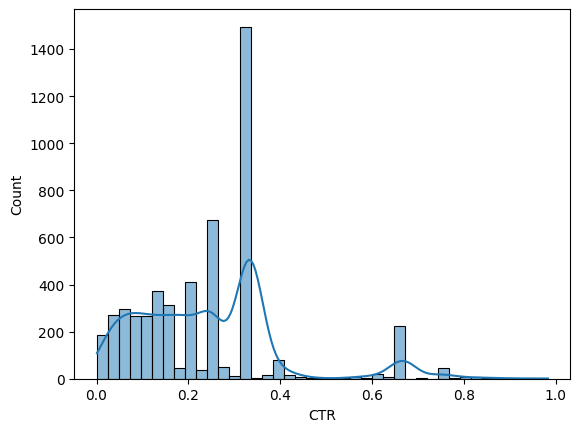

In [ ]:
sns.histplot(group_d['CTR'], kde = True)
plt.show()

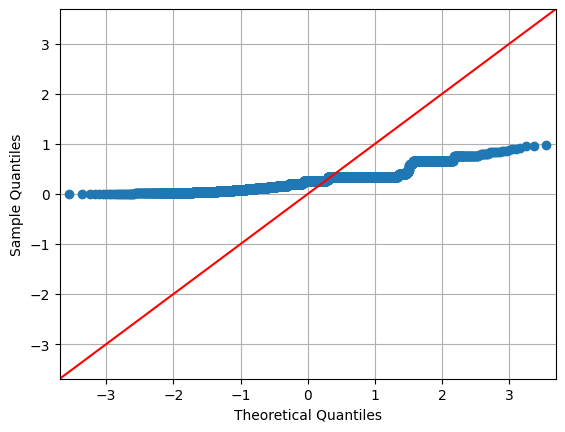

In [ ]:
import statsmodels.api as sm
import pylab as py

sm.qqplot(group_d['CTR'], line = '45')
py.grid()
py.show()

In [ ]:
train_df.columns

Index(['Click', 'Impression', 'DisplayURL', 'AdId', 'AdvertiserId', 'Depth',
       'Position', 'Id', 'Gender', 'AgeGroup', 'Query_len', 'Desc_len',
       'Title_len', 'Keyword_len', 'Query_Desc_cos_sim', 'Query_Title_cos_sim',
       'Query_Keyword_cos_sim', 'Desc_Title_cos_sim', 'Desc_Keyword_cos_sim',
       'Title_Keyword_cos_sim', 'Query_Desc_sim', 'Query_Title_sim',
       'Query_Keyword_sim', 'Desc_Title_sim', 'Desc_Keyword_sim',
       'Title_Keyword_sim', 'CTR', 'AgeGroupImputed', 'GenderImputed'],
      dtype='object')

In [ ]:
features = ['Query_Desc_cos_sim', 'Query_Title_cos_sim',
            'Query_Keyword_cos_sim', 'Desc_Title_cos_sim', 'Desc_Keyword_cos_sim',
            'Title_Keyword_cos_sim', 'Query_Desc_sim', 'Query_Title_sim',
            'Query_Keyword_sim', 'Desc_Title_sim', 'Desc_Keyword_sim',
            'Title_Keyword_sim'
       ]
# x1 = group_a.describe(percentiles=percentiles)[features].T
# x2 = group_b.describe(percentiles=percentiles)[features].T
# x3 = group_c.describe(percentiles=percentiles)[features].T
# x4 = group_d.describe(percentiles=percentiles)[features].T
x1 = group_a.describe()[features].T
x2 = group_b.describe()[features].T
x3 = group_c.describe()[features].T
x4 = group_d.describe()[features].T

In [ ]:
x1.compare(x2)

count               mean                 std  \
                          self    other      self     other      self   
Query_Desc_cos_sim     51228.0  38663.0  0.145163  0.185998  0.122600   
Query_Title_cos_sim    51228.0  38663.0  0.272140  0.358167  0.178242   
Query_Keyword_cos_sim  51228.0  38663.0  0.616464  0.699963  0.297491   
Desc_Title_cos_sim     51228.0  38663.0  0.312343  0.331529  0.157138   
Desc_Keyword_cos_sim   51228.0  38663.0  0.222802  0.248131  0.151210   
Title_Keyword_cos_sim  51228.0  38663.0  0.423436  0.480208  0.197226   
Query_Desc_sim         51228.0  38663.0  1.013821  1.357887  0.922560   
Query_Title_sim        51228.0  38663.0  1.285176  1.736984  0.936408   
Query_Keyword_sim      51228.0  38663.0  1.424631  1.791842  0.898330   
Desc_Title_sim         51228.0  38663.0  3.876396  4.122779  2.248345   
Desc_Keyword_sim       51228.0  38663.0  1.361872  1.618809  1.116705   
Title_Keyword_sim      51228.0  38663.0  1.763098  2.102605  1.117713   

                                      25%                 50%            \
                          other      self     other      self     other   
Query_Desc_cos_sim     0.138541  0.000000  0.097590  0.141421  0.176777   
Query_Title_cos_sim    0.190811  0.169031  0.223607  0.267261  0.353553   
Query_Keyword_cos_sim  0.279116  0.408248  0.500000  0.577350  0.707107   
Desc_Title_cos_sim     0.156586  0.210819  0.226455  0.303046  0.316228   
Desc_Keyword_cos_sim   0.153644  0.114708  0.147442  0.242536  0.272166   
Title_Keyword_cos_sim  0.182443  0.353553  0.392232  0.447214  0.500000   
Query_Desc_sim         1.114923  0.000000  1.000000       NaN       NaN   
Query_Title_sim        1.075717       NaN       NaN  1.000000  2.000000   
Query_Keyword_sim      1.052680       NaN       NaN  1.000000  2.000000   
Desc_Title_sim         2.245488  2.000000  3.000000       NaN       NaN   
Desc_Keyword_sim       1.208363       NaN       NaN  1.000000  2.000000   
Title_Keyword_sim      1.136783       NaN       NaN       NaN       NaN   

                            75%            max        
                           self     other self other  
Query_Desc_cos_sim     0.235702  0.280056  1.0   1.0  
Query_Title_cos_sim    0.400000  0.500000  NaN   NaN  
Query_Keyword_cos_sim  0.912871  1.000000  NaN   NaN  
Desc_Title_cos_sim     0.416667  0.438529  NaN   NaN  
Desc_Keyword_cos_sim   0.333333  0.363803  NaN   NaN  
Title_Keyword_cos_sim  0.547723  0.577350  NaN   NaN  
Query_Desc_sim         1.000000  2.000000  NaN   NaN  
Query_Title_sim             NaN       NaN  NaN   NaN  
Query_Keyword_sim           NaN       NaN  NaN   NaN  
Desc_Title_sim              NaN       NaN  NaN   NaN  
Desc_Keyword_sim            NaN       NaN  8.0   7.0  
Title_Keyword_sim      2.000000  3.000000  NaN   NaN

In [ ]:
x1.compare(x3)

count              mean                 std  \
                          self   other      self     other      self   
Query_Desc_cos_sim     51228.0  4951.0  0.145163  0.181472  0.122600   
Query_Title_cos_sim    51228.0  4951.0  0.272140  0.350089  0.178242   
Query_Keyword_cos_sim  51228.0  4951.0  0.616464  0.694907  0.297491   
Desc_Title_cos_sim     51228.0  4951.0  0.312343  0.326827  0.157138   
Desc_Keyword_cos_sim   51228.0  4951.0  0.222802  0.242195  0.151210   
Title_Keyword_cos_sim  51228.0  4951.0  0.423436  0.470141  0.197226   
Query_Desc_sim         51228.0  4951.0  1.013821  1.292466  0.922560   
Query_Title_sim        51228.0  4951.0  1.285176  1.659463  0.936408   
Query_Keyword_sim      51228.0  4951.0  1.424631  1.708948  0.898330   
Desc_Title_sim         51228.0  4951.0  3.876396  4.013331  2.248345   
Desc_Keyword_sim       51228.0  4951.0  1.361872  1.530196  1.116705   
Title_Keyword_sim      51228.0  4951.0  1.763098  1.999596  1.117713   

                                      25%                 50%            \
                          other      self     other      self     other   
Query_Desc_cos_sim     0.138477  0.000000  0.069250  0.141421  0.174078   
Query_Title_cos_sim    0.189845  0.169031  0.223607  0.267261  0.348155   
Query_Keyword_cos_sim  0.281750  0.408248  0.500000  0.577350  0.707107   
Desc_Title_cos_sim     0.155385  0.210819  0.226455  0.303046  0.316228   
Desc_Keyword_cos_sim   0.152629  0.114708  0.144338  0.242536  0.258199   
Title_Keyword_cos_sim  0.181368  0.353553  0.377964  0.447214  0.500000   
Query_Desc_sim         1.082693  0.000000  1.000000       NaN       NaN   
Query_Title_sim        1.056758       NaN       NaN       NaN       NaN   
Query_Keyword_sim      1.027067       NaN       NaN  1.000000  2.000000   
Desc_Title_sim         2.199776       NaN       NaN       NaN       NaN   
Desc_Keyword_sim       1.160045       NaN       NaN       NaN       NaN   
Title_Keyword_sim      1.117898       NaN       NaN       NaN       NaN   

                            75%             max        
                           self     other  self other  
Query_Desc_cos_sim     0.235702  0.280056   1.0   1.0  
Query_Title_cos_sim    0.400000  0.474342   NaN   NaN  
Query_Keyword_cos_sim  0.912871  1.000000   NaN   NaN  
Desc_Title_cos_sim     0.416667  0.428746   1.0   1.0  
Desc_Keyword_cos_sim   0.333333  0.353553   1.0   1.0  
Title_Keyword_cos_sim  0.547723  0.577350   NaN   NaN  
Query_Desc_sim         1.000000  2.000000   NaN   NaN  
Query_Title_sim             NaN       NaN   8.0  10.0  
Query_Keyword_sim           NaN       NaN   NaN   NaN  
Desc_Title_sim              NaN       NaN  16.0  14.0  
Desc_Keyword_sim            NaN       NaN   8.0   7.0  
Title_Keyword_sim      2.000000  3.000000   NaN   NaN

In [ ]:
x3.compare(x2)

count               mean                 std  \
                         self    other      self     other      self   
Query_Desc_cos_sim     4951.0  38663.0  0.181472  0.185998  0.138477   
Query_Title_cos_sim    4951.0  38663.0  0.350089  0.358167  0.189845   
Query_Keyword_cos_sim  4951.0  38663.0  0.694907  0.699963  0.281750   
Desc_Title_cos_sim     4951.0  38663.0  0.326827  0.331529  0.155385   
Desc_Keyword_cos_sim   4951.0  38663.0  0.242195  0.248131  0.152629   
Title_Keyword_cos_sim  4951.0  38663.0  0.470141  0.480208  0.181368   
Query_Desc_sim         4951.0  38663.0  1.292466  1.357887  1.082693   
Query_Title_sim        4951.0  38663.0  1.659463  1.736984  1.056758   
Query_Keyword_sim      4951.0  38663.0  1.708948  1.791842  1.027067   
Desc_Title_sim         4951.0  38663.0  4.013331  4.122779  2.199776   
Desc_Keyword_sim       4951.0  38663.0  1.530196  1.618809  1.160045   
Title_Keyword_sim      4951.0  38663.0  1.999596  2.102605  1.117898   

                                      25%                 50%            \
                          other      self     other      self     other   
Query_Desc_cos_sim     0.138541  0.069250  0.097590  0.174078  0.176777   
Query_Title_cos_sim    0.190811       NaN       NaN  0.348155  0.353553   
Query_Keyword_cos_sim  0.279116       NaN       NaN       NaN       NaN   
Desc_Title_cos_sim     0.156586       NaN       NaN       NaN       NaN   
Desc_Keyword_cos_sim   0.153644  0.144338  0.147442  0.258199  0.272166   
Title_Keyword_cos_sim  0.182443  0.377964  0.392232       NaN       NaN   
Query_Desc_sim         1.114923       NaN       NaN       NaN       NaN   
Query_Title_sim        1.075717       NaN       NaN  1.000000  2.000000   
Query_Keyword_sim      1.052680       NaN       NaN       NaN       NaN   
Desc_Title_sim         2.245488  2.000000  3.000000       NaN       NaN   
Desc_Keyword_sim       1.208363       NaN       NaN  1.000000  2.000000   
Title_Keyword_sim      1.136783       NaN       NaN       NaN       NaN   

                            75%             max        
                           self     other  self other  
Query_Desc_cos_sim          NaN       NaN   1.0   1.0  
Query_Title_cos_sim    0.474342  0.500000   NaN   NaN  
Query_Keyword_cos_sim       NaN       NaN   NaN   NaN  
Desc_Title_cos_sim     0.428746  0.438529   1.0   1.0  
Desc_Keyword_cos_sim   0.353553  0.363803   1.0   1.0  
Title_Keyword_cos_sim       NaN       NaN   NaN   NaN  
Query_Desc_sim              NaN       NaN   NaN   NaN  
Query_Title_sim             NaN       NaN  10.0   8.0  
Query_Keyword_sim           NaN       NaN   NaN   NaN  
Desc_Title_sim              NaN       NaN  14.0  16.0  
Desc_Keyword_sim            NaN       NaN   NaN   NaN  
Title_Keyword_sim           NaN       NaN   NaN   NaN

In [ ]:
x1['Lower_IQ'] = x1['50%'] - 1.5*(x1['75%']-x1['25%'])
x1['Higher_IQ']= x1['50%'] + 1.5*(x1['75%']-x1['25%'])

x2['Lower_IQ'] = x2['50%'] - 1.5*(x2['75%']-x2['25%'])
x2['Higher_IQ']= x2['50%'] + 1.5*(x2['75%']-x2['25%'])

x3['Lower_IQ'] = x3['50%'] - 1.5*(x3['75%']-x3['25%'])
x3['Higher_IQ']= x3['50%'] + 1.5*(x3['75%']-x3['25%'])

In [ ]:
cols = [ 'Lower_IQ', '25%', '50%', '75%', 'Higher_IQ', 'max' ]
x1[cols][:6]

,Lower_IQ,25%,50%,75%,Higher_IQ,max
Query_Desc_cos_sim,-0.212132,0.000000,0.141421,0.235702,0.494975,1.0
Query_Title_cos_sim,-0.079192,0.169031,0.267261,0.400000,0.613715,1.0
Query_Keyword_cos_sim,-0.179584,0.408248,0.577350,0.912871,1.334284,1.0
Desc_Title_cos_sim,-0.005726,0.210819,0.303046,0.416667,0.611818,1.0
Desc_Keyword_cos_sim,-0.085403,0.114708,0.242536,0.333333,0.570474,1.0
Title_Keyword_cos_sim,0.155960,0.353553,0.447214,0.547723,0.738467,1.0


In [ ]:
x2[cols][:6]

,Lower_IQ,25%,50%,75%,Higher_IQ,max
Query_Desc_cos_sim,-0.096922,0.097590,0.176777,0.280056,0.450476,1.0
Query_Title_cos_sim,-0.061036,0.223607,0.353553,0.500000,0.768143,1.0
Query_Keyword_cos_sim,-0.042893,0.500000,0.707107,1.000000,1.457107,1.0
Desc_Title_cos_sim,-0.001883,0.226455,0.316228,0.438529,0.634338,1.0
Desc_Keyword_cos_sim,-0.052377,0.147442,0.272166,0.363803,0.596708,1.0
Title_Keyword_cos_sim,0.222323,0.392232,0.500000,0.577350,0.777677,1.0


In [ ]:
x3[cols][:6]

,Lower_IQ,25%,50%,75%,Higher_IQ,max
Query_Desc_cos_sim,-0.142132,0.069250,0.174078,0.280056,0.490287,1.0
Query_Title_cos_sim,-0.027947,0.223607,0.348155,0.474342,0.724258,1.0
Query_Keyword_cos_sim,-0.042893,0.500000,0.707107,1.000000,1.457107,1.0
Desc_Title_cos_sim,0.012791,0.226455,0.316228,0.428746,0.619664,1.0
Desc_Keyword_cos_sim,-0.055625,0.144338,0.258199,0.353553,0.572023,1.0
Title_Keyword_cos_sim,0.200921,0.377964,0.500000,0.577350,0.799079,1.0


In [ ]:
x4['Lower_IQ'] = x4['50%'] - 1.5*(x4['75%']-x4['25%'])
x4['Higher_IQ']= x4['50%'] + 1.5*(x4['75%']-x4['25%'])
x4[cols][:6]

,Lower_IQ,25%,50%,75%,Higher_IQ,max
Query_Desc_cos_sim,-0.250439,0.000000,0.182574,0.288675,0.615587,1.0
Query_Title_cos_sim,-0.061036,0.223607,0.353553,0.500000,0.768143,1.0
Query_Keyword_cos_sim,0.024597,0.500000,0.774597,1.000000,1.524597,1.0
Desc_Title_cos_sim,0.006392,0.226455,0.316228,0.433013,0.626064,1.0
Desc_Keyword_cos_sim,-0.075525,0.138675,0.258199,0.361158,0.591923,1.0
Title_Keyword_cos_sim,0.200921,0.377964,0.500000,0.577350,0.799079,1.0


In [ ]:
cut_offs = {
            'Query_Desc_cos_sim':   [ [0.069250, 0.280056]],
            'Query_Title_cos_sim':  [ [0.223607, 0.474342]],
            'Query_Keyword_cos_sim':[ [0.500000, 1.000000]],
            'Desc_Title_cos_sim' :  [ [0.226455, 0.428746]],
            'Desc_Keyword_cos_sim': [ [0.144338, 0.353553]],
            'Title_Keyword_cos_sim':[ [0.377964, 0.577350]],
}

### Model 1 - 90 percentile Based

In [ ]:
# group_d = train_df_sampled[((train_df_sampled['CTR']>0) & (train_df_sampled['CTR']<.5)) | ((train_df_sampled['CTR']>.5) & (train_df_sampled['CTR']<1))]
cols = ['Lower_IQ', '25%', '50%', '75%', '90%', '99%', 'Higher_IQ', 'max']
x5 = train_df_sampled[((train_df_sampled['CTR']>0) & (train_df_sampled['CTR']<.5))][features].describe(percentiles=[.25, .5, .75, .9, .99]).T
x5['Lower_IQ'] = x5['50%'] - 1.5*(x5['75%']-x5['25%'])
x5['Higher_IQ']= x5['50%'] + 1.5*(x5['75%']-x5['25%'])
x5[cols][:6]

,Lower_IQ,25%,50%,75%,90%,99%,Higher_IQ,max
Query_Desc_cos_sim,-0.243307,0.000000,0.176777,0.280056,0.365148,0.500000,0.596861,1.0
Query_Title_cos_sim,-0.061036,0.223607,0.353553,0.500000,0.612372,0.816497,0.768143,1.0
Query_Keyword_cos_sim,0.000000,0.500000,0.750000,1.000000,1.000000,1.000000,1.500000,1.0
Desc_Title_cos_sim,0.006392,0.226455,0.316228,0.433013,0.529150,0.755929,0.626064,1.0
Desc_Keyword_cos_sim,-0.075525,0.138675,0.258199,0.361158,0.420084,0.547723,0.591923,1.0
Title_Keyword_cos_sim,0.200921,0.377964,0.500000,0.577350,0.654654,0.894427,0.799079,1.0


In [ ]:
# cut_offs = {
#             'Query_Desc_cos_sim':    0.596861,
#             'Query_Title_cos_sim':   0.768143,
#             'Query_Keyword_cos_sim': 1.500000,
#             'Desc_Title_cos_sim' :   0.626064,
#             'Desc_Keyword_cos_sim':  0.591923,
#             'Title_Keyword_cos_sim': 0.799079,
# }

# Cut-offs have been set at 90 percentile data

cut_offs = {
            'Query_Desc_cos_sim':    0.365148,
            'Query_Title_cos_sim':   0.612372,
            'Query_Keyword_cos_sim': 1.000000,
            'Desc_Title_cos_sim' :   0.529150,
            'Desc_Keyword_cos_sim':  0.420084,
            'Title_Keyword_cos_sim': 0.654654,
}

predicted_category = {
    0: 'CTR<.5',
    1: '.5<=CTR<=1'
}

In [ ]:
def prediction(df, params = cut_offs):
    x = []
    n = len(params)/2
    for i in params.keys():
        temp = df[i].map(lambda x: 0 if x<params[i] else 1)
        x.append(np.asarray(temp))
    x = np.asarray(x)
    # print(x)
    y_pred = []
    for i in x.T:
        if np.sum(i)>=n:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

In [ ]:
def metrics_score(mat):
    tn, fp, fn, tp = mat[0][0], mat[0][1], mat[1][0], mat[1][1]
    # Accuracy
    acc = (tp+tn)/(tn+tp+fn+fp)
    # True positive rate or Precision
    tpr = tp/(tp+fp)
    # Recall
    recall = tp/(tp+fn)
    # f1 score
    f1 = 2*tpr*recall/(recall+tpr)
    return pd.DataFrame({ 'Metrics' : ['Accuracy', 'Precision', 'Recall', 'F1-score'],
                          'Score'   : [acc, tpr, recall, f1]
                  })


In [ ]:
y_pred = prediction(train_df_sampled, cut_offs)
y_true = train_df_sampled['CTR'].map(lambda x: 0 if x<.5 else 1)
mat = confusion_matrix(y_true, y_pred)
mat

array([[54018,  2026],
       [40246,  3710]])

In [ ]:
metrics_score(mat)

,Metrics,Score
0,Accuracy,0.577280
1,Precision,0.646792
2,Recall,0.084403
3,F1-score,0.149320


In [ ]:
test_df_sampled = train_df.sample(10000, random_state=79)

In [ ]:
# Percentage of sample common in both test and train sample
len(set(test_df_sampled.index).intersection(train_df_sampled.index))/len(test_df_sampled)

0.0065

In [ ]:
# For Testing dataset sample
y_pred = prediction(test_df_sampled, cut_offs)
y_true = test_df_sampled['CTR'].map(lambda x: 0 if x<.5 else 1)
mat = confusion_matrix(y_true, y_pred)
mat

array([[5354,  204],
       [4036,  406]])

In [ ]:
# For Testing dataset sample

metrics_score(mat)

,Metrics,Score
0,Accuracy,0.576000
1,Precision,0.665574
2,Recall,0.091400
3,F1-score,0.160728


We observed that accuracy is pretty low, because False Positive is very high.

In [ ]:
y_pred = prediction(train_df_sampled, cut_offs)
y_true = train_df_sampled['CTR'].map(lambda x: 0 if x<.5 else 1)
y_pred, y_true = np.asarray(y_pred), np.asarray(y_true)


In [ ]:
fp = (y_pred != y_true) & (y_true==1)
train_df_sampled[fp].head()

,Click,Impression,DisplayURL,AdId,AdvertiserId,Depth,Position,Id,Gender,AgeGroup,...,Title_Keyword_cos_sim,Query_Desc_sim,Query_Title_sim,Query_Keyword_sim,Desc_Title_sim,Desc_Keyword_sim,Title_Keyword_sim,CTR,AgeGroupImputed,GenderImputed
7066833,1,1,15859647530187389343,4291065,23778,3,2,66833,2.0,1.0,...,0.408248,1,1,2,3,1,1,1.0,1.0,2.0
12957968,1,1,11029660940276564672,3834142,27485,2,1,5957968,2.0,4.0,...,0.577350,0,1,1,3,1,2,1.0,4.0,2.0
10459465,1,1,9181086387423655937,21138842,35512,3,1,3459465,2.0,3.0,...,0.707107,1,2,2,2,1,2,1.0,3.0,2.0
11056556,1,2,8889447948261358654,21143778,24163,2,1,4056556,NaN,NaN,...,1.000000,2,2,2,2,2,2,0.5,3.0,1.0
12506771,1,1,14340390157469404125,3200239,23777,1,1,5506771,2.0,6.0,...,0.377964,0,1,1,1,0,1,1.0,6.0,2.0


In [ ]:
train_df_sampled.columns

Index(['Click', 'Impression', 'DisplayURL', 'AdId', 'AdvertiserId', 'Depth',
       'Position', 'Id', 'Gender', 'AgeGroup', 'Query_len', 'Desc_len',
       'Title_len', 'Keyword_len', 'Query_Desc_cos_sim', 'Query_Title_cos_sim',
       'Query_Keyword_cos_sim', 'Desc_Title_cos_sim', 'Desc_Keyword_cos_sim',
       'Title_Keyword_cos_sim', 'Query_Desc_sim', 'Query_Title_sim',
       'Query_Keyword_sim', 'Desc_Title_sim', 'Desc_Keyword_sim',
       'Title_Keyword_sim', 'CTR', 'AgeGroupImputed', 'GenderImputed'],
      dtype='object')

In [ ]:
train_df_sampled[fp][features].describe(percentiles=percentiles).T

,count,mean,std,min,25%,50%,68%,75%,90%,95%,99.7%,max
Query_Desc_cos_sim,40246.0,0.166234,0.122091,0.0,0.000000,0.162221,0.235702,0.258199,0.333333,0.361158,0.447214,0.707107
Query_Title_cos_sim,40246.0,0.330616,0.170293,0.0,0.218218,0.333333,0.408248,0.447214,0.547723,0.600000,0.816497,1.000000
Query_Keyword_cos_sim,40246.0,0.681169,0.279853,0.0,0.500000,0.707107,0.866025,1.000000,1.000000,1.000000,1.000000,1.000000
Desc_Title_cos_sim,40246.0,0.318433,0.149356,0.0,0.223607,0.306186,0.383482,0.420084,0.507833,0.565825,0.852803,1.000000
Desc_Keyword_cos_sim,40246.0,0.230429,0.144098,0.0,0.136083,0.250000,0.320256,0.342997,0.392232,0.426401,0.542326,0.866025
Title_Keyword_cos_sim,40246.0,0.457754,0.171256,0.0,0.377964,0.471405,0.534522,0.577350,0.632456,0.707107,1.000000,1.000000
Query_Desc_sim,40246.0,1.186975,0.940469,0.0,0.000000,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,6.000000
Query_Title_sim,40246.0,1.579138,0.939960,0.0,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,10.000000
Query_Keyword_sim,40246.0,1.638001,0.914116,0.0,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,5.000000,8.000000
Desc_Title_sim,40246.0,4.009367,2.192984,0.0,2.000000,4.000000,5.000000,5.000000,7.000000,8.000000,12.000000,16.000000


In [ ]:
train_df_sampled[y_true==0][features].describe(percentiles=percentiles).T

,count,mean,std,min,25%,50%,68%,75%,90%,95%,99.7%,max
Query_Desc_cos_sim,56044.0,0.148456,0.124718,0.0,0.000000,0.144338,0.213201,0.242536,0.316228,0.363407,0.516398,1.0
Query_Title_cos_sim,56044.0,0.279306,0.181223,0.0,0.174078,0.267261,0.353553,0.408248,0.507093,0.577350,0.816497,1.0
Query_Keyword_cos_sim,56044.0,0.625838,0.298306,0.0,0.408248,0.577350,0.816497,1.000000,1.000000,1.000000,1.000000,1.0
Desc_Title_cos_sim,56044.0,0.313756,0.157366,0.0,0.213201,0.303046,0.377964,0.416667,0.516398,0.577350,0.881917,1.0
Desc_Keyword_cos_sim,56044.0,0.224370,0.151463,0.0,0.117851,0.246183,0.316228,0.339683,0.408248,0.447214,0.577350,1.0
Title_Keyword_cos_sim,56044.0,0.426765,0.196681,0.0,0.353553,0.447214,0.534522,0.547723,0.632456,0.707107,1.000000,1.0
Query_Desc_sim,56044.0,1.034830,0.938256,0.0,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000,5.000000,7.0
Query_Title_sim,56044.0,1.315038,0.952203,0.0,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,8.0
Query_Keyword_sim,56044.0,1.450467,0.914209,0.0,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,8.0
Desc_Title_sim,56044.0,3.895154,2.252300,0.0,2.000000,4.000000,5.000000,5.000000,7.000000,8.000000,12.000000,16.0


In [ ]:
cut_offs = {
            'Query_Desc_cos_sim':    0.365148,
            'Query_Title_cos_sim':   0.612372,
            'Query_Keyword_cos_sim': 1.000000,
            'Desc_Title_cos_sim' :   0.529150,
            'Desc_Keyword_cos_sim':  0.420084,
            'Title_Keyword_cos_sim': 0.654654,
            'Query_Desc_sim'       : 0.01,
            'Query_Title_sim'      : 1.01,
            'Query_Keyword_sim'    : 1.01,
}

In [ ]:
y_pred = prediction(train_df_sampled, cut_offs)
y_true = train_df_sampled['CTR'].map(lambda x: 0 if x<.5 else 1)
mat = confusion_matrix(y_true, y_pred)
metrics_score(mat)

,Metrics,Score
0,Accuracy,0.586040
1,Precision,0.630879
2,Recall,0.140368
3,F1-score,0.229641


In [ ]:
y_pred = prediction(test_df_sampled, cut_offs)
y_true = test_df_sampled['CTR'].map(lambda x: 0 if x<.5 else 1)
mat = confusion_matrix(y_true, y_pred)
metrics_score(mat)

,Metrics,Score
0,Accuracy,0.582000
1,Precision,0.631791
2,Recall,0.141378
3,F1-score,0.231052


### Model 2 - Median Based

Clustering based

In [ ]:
# train_df_sampled.columns
cols

['Lower_IQ', '25%', '50%', '75%', 'Higher_IQ', 'max']

In [ ]:
features = ['Query_Desc_cos_sim', 'Query_Title_cos_sim',
            'Query_Keyword_cos_sim', 'Desc_Title_cos_sim', 'Desc_Keyword_cos_sim',
            'Title_Keyword_cos_sim', 'Query_Desc_sim', 'Query_Title_sim',
            'Query_Keyword_sim', 'Desc_Title_sim', 'Desc_Keyword_sim',
            'Title_Keyword_sim',
            'Query_len', 'Desc_len',
            'Title_len', 'Keyword_len',
            'AgeGroupImputed', 'GenderImputed', 'Position', 'Depth'
       ]
drop_cols = [ 'Query_Title_sim', 'Query_Desc_cos_sim',
              'Title_Keyword_cos_sim', 'Keyword_len', 'Desc_Keyword_sim'
            ]
x1 = group_a.describe(percentiles=percentiles)[features].T
x2 = group_b.describe(percentiles=percentiles)[features].T
x3 = group_c.describe(percentiles=percentiles)[features].T
x4 = group_d.describe(percentiles=percentiles)[features].T
# x1 = group_a.describe()[features].T
# x2 = group_b.describe()[features].T
# x3 = group_c.describe()[features].T
# x4 = group_d.describe()[features].T
cols = ['mean', '10%', '25%', '50%', '75%', '90%']

In [ ]:
x2[cols]

,mean,10%,25%,50%,75%,90%
Query_Desc_cos_sim,0.185998,0.000000,0.097590,0.176777,0.280056,0.369274
Query_Title_cos_sim,0.358167,0.149071,0.223607,0.353553,0.500000,0.612372
Query_Keyword_cos_sim,0.699963,0.353553,0.500000,0.707107,1.000000,1.000000
Desc_Title_cos_sim,0.331529,0.131590,0.226455,0.316228,0.438529,0.534522
Desc_Keyword_cos_sim,0.248131,0.000000,0.147442,0.272166,0.363803,0.426401
Title_Keyword_cos_sim,0.480208,0.267261,0.392232,0.500000,0.577350,0.674200
Query_Desc_sim,1.357887,0.000000,1.000000,1.000000,2.000000,3.000000
Query_Title_sim,1.736984,1.000000,1.000000,2.000000,2.000000,3.000000
Query_Keyword_sim,1.791842,1.000000,1.000000,2.000000,2.000000,3.000000
Desc_Title_sim,4.122779,1.000000,3.000000,4.000000,5.000000,7.000000


In [ ]:
dict(zip(x1.index,np.asarray(pd.DataFrame({ 'a': x1['50%'],
  'b': x3['50%'],
  'c': x2['50%']}))))

{'Query_Desc_cos_sim': array([0.14142136, 0.17407766, 0.1767767 ]),
 'Query_Title_cos_sim': array([0.26726124, 0.34815531, 0.35355339]),
 'Query_Keyword_cos_sim': array([0.57735027, 0.70710678, 0.70710678]),
 'Desc_Title_cos_sim': array([0.30304576, 0.31622777, 0.31622777]),
 'Desc_Keyword_cos_sim': array([0.24253563, 0.25819889, 0.27216553]),
 'Title_Keyword_cos_sim': array([0.4472136, 0.5      , 0.5      ]),
 'Query_Desc_sim': array([1., 1., 1.]),
 'Query_Title_sim': array([1., 1., 2.]),
 'Query_Keyword_sim': array([1., 2., 2.]),
 'Desc_Title_sim': array([4., 4., 4.]),
 'Desc_Keyword_sim': array([1., 1., 2.]),
 'Title_Keyword_sim': array([2., 2., 2.]),
 'Query_len': array([3., 3., 3.]),
 'Desc_len': array([22., 22., 22.]),
 'Title_len': array([9., 9., 9.]),
 'Keyword_len': array([2., 2., 2.]),
 'AgeGroupImputed': array([3., 3., 3.]),
 'GenderImputed': array([1., 1., 1.]),
 'Position': array([1., 1., 1.]),
 'Depth': array([2., 2., 2.])}

In [ ]:
# Median based

model_coefs = {
            'Query_Desc_cos_sim':    [0.141421, 0.174078, 0.176777],
            'Query_Title_cos_sim':   [0.267261, 0.348155, 0.353553],
            'Query_Keyword_cos_sim': [0.577350, 0.707107, 0.707107],
            'Desc_Title_cos_sim' :   [0.303046, 0.316228, 0.316228],
            'Desc_Keyword_cos_sim':  [0.242536, 0.258199, 0.272166],
            'Title_Keyword_cos_sim': [0.447214, 0.500000, 0.500000],

            'Query_Desc_sim'       : [1.000000,	1.000000, 1.000000],
            'Query_Title_sim'      : [1.000000, 1.000000, 2.000000],
            'Query_Keyword_sim'    : [1.000000, 2.000000, 2.000000],

            # 'Desc_Title_sim'       : [4.000000, 4.000000, 2.000000],
            # 'Desc_Keyword_sim'     : [1.000000, 1.000000, 2.000000],
            # 'Title_Keyword_sim'    : [2.000000, 2.000000, 2.000000],


}

categories ={
    0 : 'CTR<=.49',
    1 : '.49<CTR<=.51',
    2 : '.51<CTR<=1.0'
}

In [ ]:
def prediction(df, params = model_coefs):
    x = pd.DataFrame()
    x['dist0'] = np.zeros((len(df),))
    x['dist1'] = np.zeros((len(df),))
    x['dist2'] = np.zeros((len(df),))

    for i in params.keys():
        x['dist0'] = x['dist0'] + np.asarray(df[i] - params[i][0])**2
        x['dist1'] = x['dist1'] + np.asarray(df[i] - params[i][1])**2
        x['dist2'] = x['dist2'] + np.asarray(df[i] - params[i][2])**2

    return np.argmin(np.asarray(x)**.5, axis=1)

In [ ]:
def metrics_score(y_true=y_true, y_pred=y_pred):
    average = 'macro'
    return pd.DataFrame({ 'Metrics' : ['Accuracy', 'Precision', 'Recall', 'F1-score'],
                          'Score'   : [
                                        accuracy_score(y_true, y_pred),
                                        precision_score(y_true, y_pred, average=average),
                                        recall_score(y_true, y_pred, average=average),
                                        f1_score(y_true, y_pred, average=average)
                                       ]
                  })

In [ ]:
def categorise(df):
    return df['CTR'].map(lambda x: 0 if x <= .49 else 1 if x<=.51 else 2)

In [ ]:
y_true = categorise(train_df_sampled)
y_pred = prediction(train_df_sampled, model_coefs)
pd.DataFrame(confusion_matrix(y_true,y_pred))

,0,1,2
0,34227,3521,18295
1,2357,241,2354
2,17233,1923,19849


In [ ]:
metrics_score(y_true,y_pred)

,Metrics,Score
0,Accuracy,0.543170
1,Precision,0.389501
2,Recall,0.389426
3,F1-score,0.389248


In [ ]:
y_true.value_counts()

0    54353
2    38691
1     6956
Name: CTR, dtype: int64

In [ ]:
pd.Series(y_pred).value_counts()

0    53817
2    40498
1     5685
dtype: int64

In [ ]:
y_true[y_true==y_pred].value_counts()

0    33503
2    19682
1      339
Name: CTR, dtype: int64

In [ ]:
y_true = categorise(test_df_sampled)
y_pred = prediction(test_df_sampled, model_coefs)
pd.DataFrame(confusion_matrix(y_true,y_pred))

,0,1,2
0,3447,384,1727
1,218,29,227
2,1743,194,2031


In [ ]:
metrics_score(y_true,y_pred)

,Metrics,Score
0,Accuracy,0.550700
1,Precision,0.398275
2,Recall,0.397738
3,F1-score,0.397692


### Model 3 - Mean Based

In [ ]:
mean_model_coefs = dict(zip(x1.index,np.asarray(pd.DataFrame({ 'a': x1['50%'],
                                                                'b': x3['50%'],
                                                            'c': x2['50%']}))))

In [ ]:
mean_model_coefs = {
                'Query_Desc_cos_sim'   : [0.14516261, 0.18147244, 0.18599756],
                'Query_Title_cos_sim'  : [0.2721399 , 0.35008937, 0.35816725],
                'Query_Keyword_cos_sim': [0.61646402, 0.69490687, 0.69996293],
                'Desc_Title_cos_sim'   : [0.31234263, 0.32682681, 0.33152937],
                'Desc_Keyword_cos_sim' : [0.22280243, 0.24219542, 0.24813101],
                'Title_Keyword_cos_sim': [0.42343594, 0.47014131, 0.48020764],

                'Query_Desc_sim'       : [1.01382057, 1.29246617, 1.35788739],
                'Query_Title_sim'      : [1.28517608, 1.65946273, 1.73698368],
                'Query_Keyword_sim'    : [1.42463106, 1.70894769, 1.79184233],
                'Desc_Title_sim'       : [3.87639572, 4.01333064, 4.12277888],
                'Desc_Keyword_sim'     : [1.36187241, 1.53019592, 1.61880868],
                'Title_Keyword_sim'    : [1.76309831, 1.99959604, 2.10260456],
                'Query_len'            : [2.99681815, 2.97657039, 3.07216202],
                'Desc_len'             : [21.35515734, 21.62169259, 21.8255953],
                'Title_len'            : [8.79950418, 8.79781862, 8.92382898],
                'Keyword_len'          : [2.10701179, 2.25005049, 2.3420583 ],
                'AgeGroupImputed'      : [3.34438198, 3.31872349, 3.39404599],
                'GenderImputed'        : [1.41389475, 1.33791153, 1.38217417],
                'Position'             : [1.46179824, 1.28216522, 1.29100173],
                'Depth'                : [1.90224096, 1.81013937, 1.87603135],
 }

In [ ]:
y_true = categorise(train_df_sampled)
y_pred = prediction(train_df_sampled, mean_model_coefs)
pd.DataFrame(confusion_matrix(y_true,y_pred))

,0,1,2
0,30356,3366,22321
1,2306,451,2195
2,16339,3467,19199


In [ ]:
metrics_score(y_true,y_pred)

,Metrics,Score
0,Accuracy,0.500060
1,Precision,0.373533
2,Recall,0.374983
3,F1-score,0.371959


In [ ]:
y_true = categorise(test_df_sampled)
y_pred = prediction(test_df_sampled, model_coefs)
pd.DataFrame(confusion_matrix(y_true,y_pred))

,0,1,2
0,2213,1466,1879
1,150,159,165
2,1198,1468,1302


In [ ]:
metrics_score(y_true,y_pred)

,Metrics,Score
0,Accuracy,0.367400
1,Precision,0.353994
2,Recall,0.353911
3,F1-score,0.310180


## Training

## Rough

In [ ]:
%%time
# df = pd.read_csv('test.csv')
# df.isnull().sum()/len(df)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
